
# 使用字典学习的图像去噪

一个使用在线字典学习方法重建噪声片段的莱娜图像的效果比较的例子。

In [7]:
print(__doc__)

from PIL import Image

import matplotlib.pyplot as plt
import numpy as np
import scipy as sp

from sklearn.decomposition import MiniBatchDictionaryLearning
from sklearn.feature_extraction.image import extract_patches_2d
from sklearn.feature_extraction.image import reconstruct_from_patches_2d

Automatically created module for IPython interactive environment


In [9]:
%matplotlib inline

from tensorflow.keras.utils import load_img

In [11]:
# load an image from file  
image = load_img('lena_gray_256.tif')  

from tensorflow.keras.utils import img_to_array  
# convert the image pixels to a numpy array  
image = img_to_array(image) 

image = image[:,:,0]

print("original shape", image.shape)

original shape (256, 256)


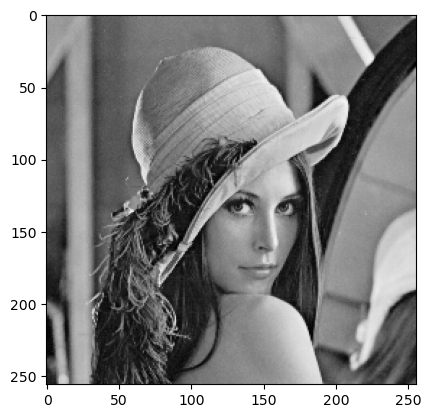

In [12]:
image = image.astype('float32')
image/=255

plt.imshow(image, cmap='gray')

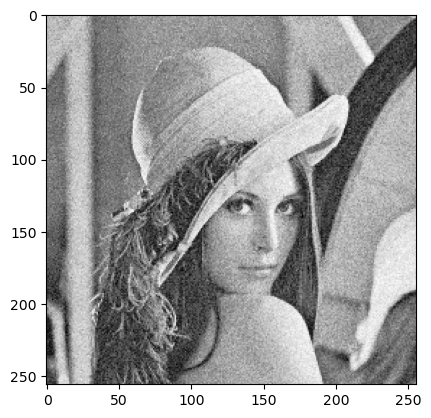

In [13]:
noise = np.random.normal(loc=0, scale=0.05, size=image.shape)
x_test_noisy1 = image + noise
x_test_noisy1 = np.clip(x_test_noisy1, 0., 1.)

plt.imshow(x_test_noisy1, cmap='Greys_r')

imgs = (x_test_noisy1 * 255).astype(np.uint8)
Image.fromarray(imgs).save('lena_noisy.png')

In [14]:
# Extract all reference patches from the left half of the image
print('Extracting reference patches...')
patch_size = (5, 5)
data = extract_patches_2d(image, patch_size)
print(data.shape)

Extracting reference patches...
(63504, 5, 5)


In [15]:
data = data.reshape(data.shape[0], -1)
print(data.shape)

(63504, 25)


In [16]:
data -= np.mean(data, axis=0)
data /= np.std(data, axis=0)

In [17]:
# #############################################################################
# Learn the dictionary from reference patches
print('Learning the dictionary...')
dico = MiniBatchDictionaryLearning(n_components=144, alpha=1, n_iter=500)
V = dico.fit(data).components_

Learning the dictionary...


(144, 25)


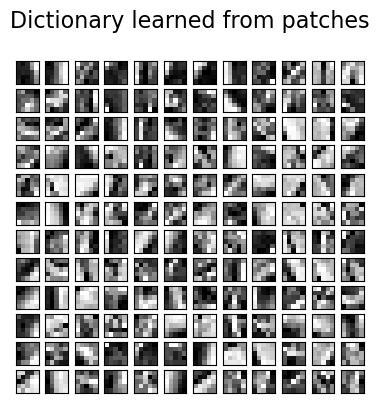

In [18]:
print(V.shape)

plt.figure(figsize=(4.2, 4))
for i, comp in enumerate(V[:144]):
    plt.subplot(12, 12, i + 1)
    plt.imshow(comp.reshape(patch_size), cmap=plt.cm.gray_r,
               interpolation='nearest')
    plt.xticks(())
    plt.yticks(())
plt.suptitle('Dictionary learned from patches\n', fontsize=16)
plt.subplots_adjust(0.08, 0.02, 0.92, 0.85, 0.08, 0.23)

In [19]:
# #############################################################################
# Extract noisy patches and reconstruct them using the dictionary

print('Extracting noisy patches... ')
data = extract_patches_2d(x_test_noisy1, patch_size)
data = data.reshape(data.shape[0], -1)
intercept = np.mean(data, axis=0)
data -= intercept

Extracting noisy patches... 


Orthogonal Matching Pursuit
2 atoms...


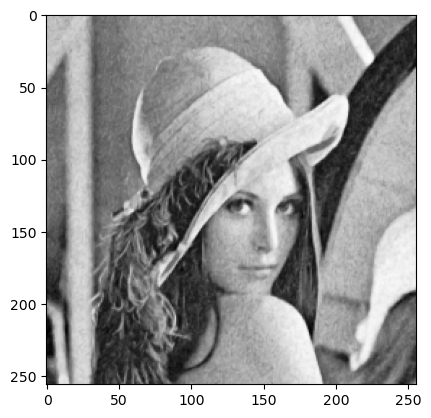

In [20]:
print('Orthogonal Matching Pursuit\n2 atoms' + '...')
reconstructions = x_test_noisy1.copy()

dico.set_params(transform_algorithm='omp', **{'transform_n_nonzero_coefs': 2})
code = dico.transform(data)
patches = np.dot(code, V)

patches += intercept
patches = patches.reshape(len(data), *patch_size)

reconstructions = reconstruct_from_patches_2d(patches, (256, 256))

plt.imshow(reconstructions, cmap='Greys_r')

In [21]:
imgs = (reconstructions * 255).astype(np.uint8)
Image.fromarray(imgs).save('lena_denoise_from_original.png')

In [22]:
# Extract all reference patches from the left half of the image
print('Extracting reference patches...')
patch_size = (5, 5)
data = extract_patches_2d(x_test_noisy1, patch_size)
print(data.shape)

Extracting reference patches...
(63504, 5, 5)


In [23]:
data = data.reshape(data.shape[0], -1)
print(data.shape)

data -= np.mean(data, axis=0)
data /= np.std(data, axis=0)

(63504, 25)


In [24]:
# #############################################################################
# Learn the dictionary from reference patches
print('Learning the dictionary...')
dico = MiniBatchDictionaryLearning(n_components=144, alpha=1, n_iter=500)
V = dico.fit(data).components_

Learning the dictionary...


(144, 25)


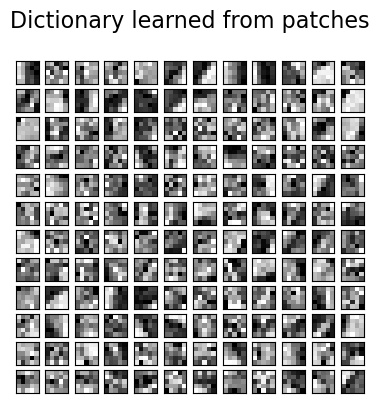

In [25]:
print(V.shape)

plt.figure(figsize=(4.2, 4))
for i, comp in enumerate(V[:144]):
    plt.subplot(12, 12, i + 1)
    plt.imshow(comp.reshape(patch_size), cmap=plt.cm.gray_r,
               interpolation='nearest')
    plt.xticks(())
    plt.yticks(())
plt.suptitle('Dictionary learned from patches\n', fontsize=16)
plt.subplots_adjust(0.08, 0.02, 0.92, 0.85, 0.08, 0.23)

Extracting noisy patches... 
Orthogonal Matching Pursuit
2 atoms...


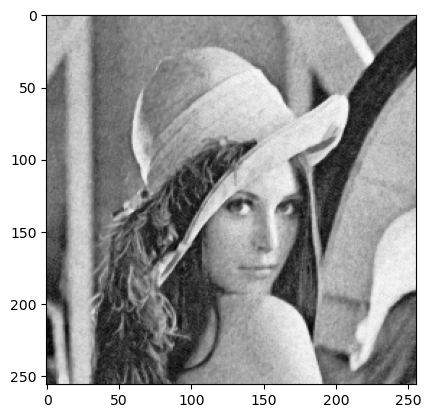

In [26]:
# #############################################################################
# Extract noisy patches and reconstruct them using the dictionary

print('Extracting noisy patches... ')
data = extract_patches_2d(x_test_noisy1, patch_size)
data = data.reshape(data.shape[0], -1)
intercept = np.mean(data, axis=0)
data -= intercept

print('Orthogonal Matching Pursuit\n2 atoms' + '...')
reconstructions_frm_noise = x_test_noisy1.copy()

dico.set_params(transform_algorithm='omp', **{'transform_n_nonzero_coefs': 2})
code = dico.transform(data)
patches = np.dot(code, V)

patches += intercept
patches = patches.reshape(len(data), *patch_size)

reconstructions_frm_noise = reconstruct_from_patches_2d(patches, (256, 256))

plt.imshow(reconstructions_frm_noise, cmap='Greys_r')

In [27]:
imgs = (reconstructions_frm_noise * 255).astype(np.uint8)
Image.fromarray(imgs).save('lena_denoise_from_noise2.png')